<h1 style="font-size:50px;">Credit Card Fraud Detection</h1>


<h2 style="font-size:30px;">Dataset</h2>


The dataset focuses on credit card transactions in September 2013, primarily by European cardholders. It consists of 284,807 transactions over two days, with 492 identified as frauds (0.172% of all transactions). Due to confidentiality, original features are not disclosed, except for 'Time' and 'Amount'. The features V1 to V28 result from PCA transformation. 'Time' denotes seconds elapsed since the first transaction, and 'Amount' signifies the transaction amount. The 'Class' feature indicates fraud (1) or non-fraud (0). Due to imbalance, accuracy is better evaluated using Area Under the Precision-Recall Curve (AUPRC), as confusion matrix accuracy is inappropriate for unbalanced classification.



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Display basic information about the dataset
data.head()
data.tail()
data.shape
data.info()
data.describe()
data.isnull().sum()

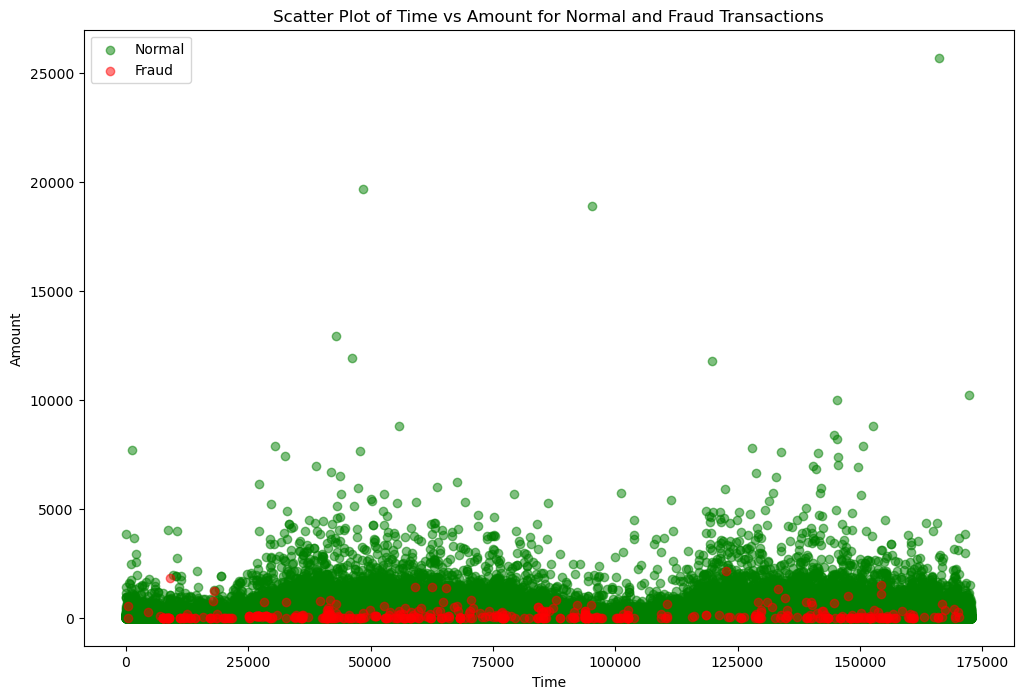

In [10]:
normal = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

plt.figure(figsize=(12, 8))

# Scatter plot for Normal Transactions
if 'Time' in data.columns:
    plt.scatter(normal['Time'], normal['Amount'], color='green', label='Normal', alpha=0.5)

# Scatter plot for Fraud Transactions
plt.scatter(fraud['Time'], fraud['Amount'], color='red', label='Fraud', alpha=0.5)

plt.title('Scatter Plot of Time vs Amount for Normal and Fraud Transactions')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend()
plt.show()


<Axes: ylabel='count'>

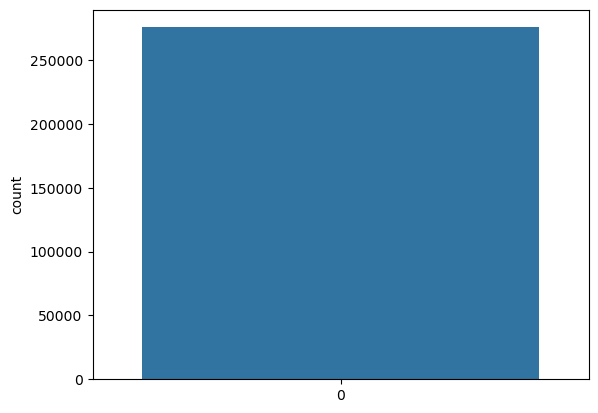

In [11]:

# Standardize the 'Amount' column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data['Amount'] = sc.fit_transform(data[['Amount']])

# Drop the 'Time' column
data = data.drop(['Time'], axis=1)

# Check for and drop duplicate entries
data.duplicated().any()
data.drop_duplicates(inplace=True)
data.duplicated().any()

# Visualize class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data['Class'])


<h2 style="font-size:30px;">Splitting the dataset into the training set and Test Set
</h2>


In [12]:
# Split the dataset
X = data.drop('Class', axis=1)
y = data['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<h2 style="font-size:30px;">Logistic Regression

</h2>



In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

log = LogisticRegression()
log.fit(X_train, y_train)

# Predictions and evaluation
y_pred1 = log.predict(X_test)
accuracy_score(y_test, y_pred1)
precision_score(y_test, y_pred1)
recall_score(y_test, y_pred1)
f1_score(y_test, y_pred1)



0.7354838709677419

<h2 style="font-size:30px;">Logistic Regression

</h2>



In [14]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

# Predictions and evaluation
y_pred1 = log.predict(X_test)
accuracy_score(y_test, y_pred1)
precision_score(y_test, y_pred1)
recall_score(y_test, y_pred1)
f1_score(y_test, y_pred1)


accuracy_score(y_test, y_pred1), precision_score(y_test, y_pred1),recall_score(y_test, y_pred1),f1_score(y_test, y_pred1)

(0.9992563437505668, 0.890625, 0.6263736263736264, 0.7354838709677419)

<h2 style="font-size:30px;">Logistic Regression

</h2>



In [15]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

# Predictions and evaluation
y_pred1 = log.predict(X_test)
accuracy_score(y_test, y_pred1)
precision_score(y_test, y_pred1)
recall_score(y_test, y_pred1)
f1_score(y_test, y_pred1)

accuracy_score(y_test, y_pred1), precision_score(y_test, y_pred1),recall_score(y_test, y_pred1),f1_score(y_test, y_pred1)

(0.9992563437505668, 0.890625, 0.6263736263736264, 0.7354838709677419)

<h2 style="font-size:30px;">Imbalanced Dataset

</h2>

An imbalanced dataset refers to a situation where the distribution of classes in the dataset is not uniform, meaning that one class is significantly more prevalent than the others. In the context of binary classification, this often means that one class (usually the majority class) has much more representation than the other (minority class).

Handling imbalanced datasets typically involves techniques like undersampling and oversampling:

<h2 style="font-size:30px;">Undersampling
</h2>

In [24]:
# Undersampling
normal = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]
normal_sample = normal.sample(fraud.shape[0])
new_data = pd.concat([normal_sample, fraud], ignore_index=True)

# Split the undersampled data
X = new_data.drop('Class', axis=1)
y = new_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression on undersampled data
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred1 = log.predict(X_test)

# Evaluation metrics for undersampled data
accuracy_score(y_test, y_pred1)
precision_score(y_test, y_pred1)
recall_score(y_test, y_pred1)
f1_score(y_test, y_pred1)
accuracy_score(y_test, y_pred1), precision_score(y_test, y_pred1),recall_score(y_test, y_pred1),f1_score(y_test, y_pred1)

(0.9473684210526315,
 0.9893617021276596,
 0.9117647058823529,
 0.9489795918367347)

<h2 style="font-size:30px;">Decision Tree Classifier
</h2>

In [17]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predictions and evaluation
y_pred2 = dt.predict(X_test)
precision_score(y_test, y_pred2)
recall_score(y_test, y_pred2)
f1_score(y_test, y_pred2)


0.926829268292683

<h2 style="font-size:30px;">Random Forest Classifier
</h2>  


<Axes: xlabel='Models', ylabel='ACC'>

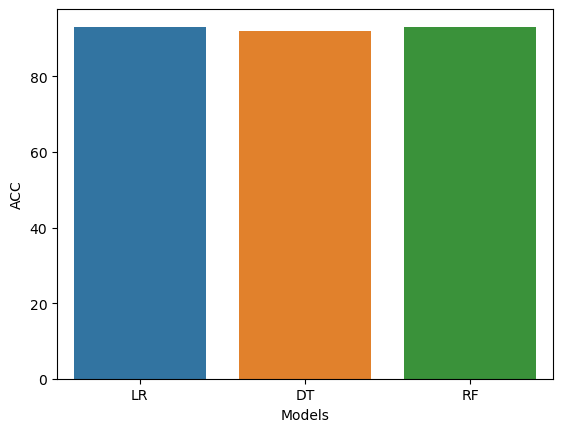

In [18]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred3 = rf.predict(X_test)
accuracy_score(y_test, y_pred3)
precision_score(y_test, y_pred3)
recall_score(y_test, y_pred3)
f1_score(y_test, y_pred3)

# Create a dataframe for comparison
final_data = pd.DataFrame({'Models': ['LR', 'DT', 'RF'],
                           "ACC": [accuracy_score(y_test, y_pred1) * 100,
                                   accuracy_score(y_test, y_pred2) * 100,
                                   accuracy_score(y_test, y_pred3) * 100
                                   ]})

# Visualize the comparison
sns.barplot(x=final_data['Models'], y=final_data['ACC'])


<h2 style="font-size:30px;">OverSampling

</h2>  


In [19]:
# Oversampling using SMOTE
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X, y)

# Split the oversampled data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

# Logistic Regression on oversampled data
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred1 = log.predict(X_test)

# Evaluation metrics for oversampled data
accuracy_score(y_test, y_pred1), precision_score(y_test, y_pred1), recall_score(y_test, y_pred1), f1_score(y_test, y_pred1)


(0.9315789473684211,
 0.9587628865979382,
 0.9117647058823529,
 0.9346733668341709)

<h2 style="font-size:30px;">Decision Tree Classifier

</h2>  


In [20]:
# Decision Tree Classifier on oversampled data
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred2 = dt.predict(X_test)

# Evaluation metrics for oversampled data
accuracy_score(y_test, y_pred2), precision_score(y_test, y_pred2), recall_score(y_test, y_pred2), f1_score(y_test, y_pred2)


(0.9105263157894737, 0.912621359223301, 0.9215686274509803, 0.9170731707317074)

<h2 style="font-size:30px;">Random Forest Classifier


</h2>  


<Axes: xlabel='Models', ylabel='ACC'>

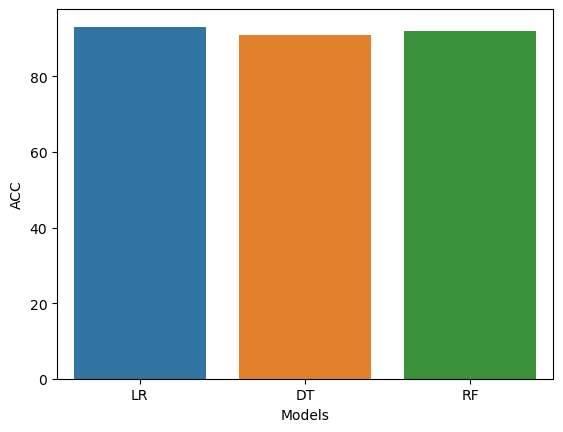

In [21]:
# Random Forest Classifier on oversampled data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred3 = rf.predict(X_test)

# Evaluation metrics for oversampled data
accuracy_score(y_test, y_pred3), precision_score(y_test, y_pred3), recall_score(y_test, y_pred3), f1_score(y_test, y_pred3)
# Create a dataframe for comparison
final_data = pd.DataFrame({'Models': ['LR', 'DT', 'RF'],
                           "ACC": [accuracy_score(y_test, y_pred1) * 100,
                                   accuracy_score(y_test, y_pred2) * 100,
                                   accuracy_score(y_test, y_pred3) * 100
                                   ]})

# Visualize the comparison
sns.barplot(x=final_data['Models'], y=final_data['ACC'])


<h2 style="font-size:30px;">Confusion Matrix Visualisation


</h2>  


Text(0.5, 754.9575163398694, 'Predicted class')

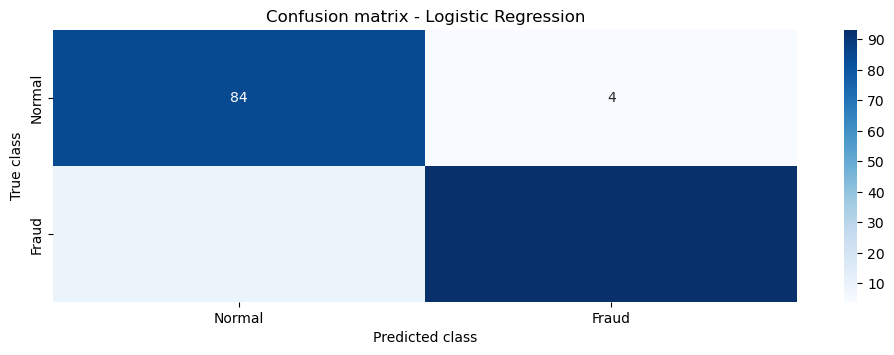

In [22]:
from sklearn.metrics import confusion_matrix
# Logistic Regression
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)

# Define LABELS
LABELS = ['Normal', 'Fraud']

# Confusion matrix visualization for Logistic Regression
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
sns.heatmap(conf_matrix_log, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix - Logistic Regression")
plt.ylabel('True class')
plt.xlabel('Predicted class')
